In [9]:
import numpy as np
from netCDF4 import Dataset as NetCDFFile
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import colorbar, colors


In [10]:
file_ = 'http://ns9481k.hyrax.sigma2.no/opendap/hyrax/CVLtest/archm_20190719_12.nc' #address of sample file on cloud
ice = 'http://ns9481k.hyrax.sigma2.no/opendap/hyrax/CVLtest/iceh.2019-07-19.nc'     #address of sample file on cloud

ncice = NetCDFFile(ice)                          # reading sample files
nc = NetCDFFile(file_)                           # reading sample files
lon = nc.variables['longitude'][:,:]             #longitude
lat = nc.variables['latitude'][:,:]              #latitude

primary_production = nc.variables['npp'][0,:,:]
primary_production = primary_production/1000.


In [13]:
aice  = ncice.variables['aice_d'][0,:,:]
thick = ncice.variables['hi_d'][0,:,:]
#create a masked array with zeros as filled values
primary_production = np.ma.masked_where(aice < 0.01, primary_production).filled(fill_value=0)
#store a dictionioray for properties of plots
plotted = {}
plotted[0] = {'data':aice, 'max':1., 'title':'Ice area fraction'}
plotted[2] = {'data':thick, 'max':5., 'title':'Ice thickness (m)'}
plotted[1] = {'data':primary_production, 'max':1., 'title':r'Integrated primary production below ice (gC m$^{-2}$ d$^{-1}$)'}

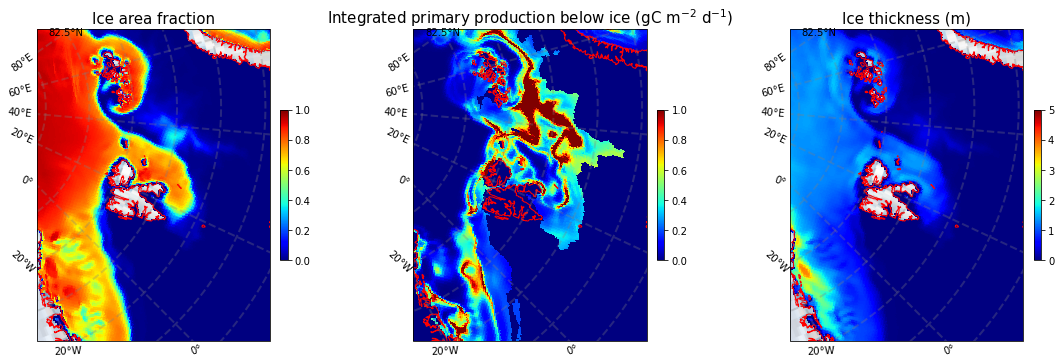

In [14]:
cmap = plt.get_cmap('jet')
figure=plt.figure(figsize=(18,6))
projection=ccrs.Stereographic(90, -45) # set the projection of plots
xyz_pro = projection.transform_points(ccrs.PlateCarree(), lon, lat) # convert longitude and latitude
for p in range(3):
    ax=figure.add_subplot(1,3,p + 1, projection=projection)
    # set the maximum and minimum of values of spectrum of plot(as well as colorbar)
    norm = colors.Normalize(vmin=0, vmax=plotted[p]['max'])
    # drowing the plot with pcolormesh
    img = ax.pcolormesh(xyz_pro[:,:,0], xyz_pro[:,:,1], plotted[p]['data'], cmap=cmap, transform=projection, norm=norm)
    # set extend of Svalbard
    ax.set_extent([500000, 2000000, -1500000, 500000], crs=projection)
    # make coastlines 
    ax.coastlines(color='red',resolution='10m') 
    ax.stock_img()
    # draw gridlines for better preceiving of projection view
    gl = ax.gridlines(transform=projection, draw_labels=True, linewidth=2, color='gray', alpha=0.3, linestyle='--')
    # remove some labels in order not to overlap with colorbar
    gl.right_labels = False
    ax.set_title(plotted[p]['title'], fontsize=15)
    figure.colorbar(img, ax = ax,fraction=0.03, pad=0.04)
plt.subplots_adjust(left = None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.show()